Relación con el Riesgo de Pobreza
    

Cuando analizamos el número total de infectados y muertos por estado, observamos una gran diferencia entre ellos, lo que nos llamó la atención y despertó nuestra curiosidad por intentar comprender el motivo de tales discrepancias.

Nuestra primera idea fue que la realidad social de cada estado podría explicar el hecho. Luego nos preguntamos qué marcadores macroeconómicos podrían utilizarse para este estudio.

Descartamos inmediatamente el uso del PIB (Producto Interior Bruto), pues sabemos hasta qué punto este índice puede enmascarar las desigualdades sociales. Hay varios países, como Brasil, que están entre las 10 mayores economías del mundo, pero tienen una elevada concentración de la renta y muchas personas que viven por debajo del umbral de la pobreza.

Entonces pensamos en utilizar el IDH (Índice de Desarrollo Humano) de los estados, pero nos dimos cuenta de que la diferencia entre los estados es muy pequeña y no podía justificar la disparidad en cuestión.

Además, lo más probable es que el IDH de una zona muy extensa, como un estado, no refleje las condiciones de vida de las familias menos favorecidas. 

 Consideramos que el índice más representativo para realizar este análisis sería el riesgo de pobreza, que es un término utilizado para describir la situación en la que una persona o grupo de personas se encuentra en una posición económica vulnerable, con un alto riesgo de caer por debajo del umbral de la pobreza. En general, se refiere a la probabilidad de que una persona tenga unos ingresos bajos o insuficientes para cubrir necesidades básicas como la alimentación, la vivienda, la sanidad y la educación.

El riesgo de pobreza puede variar según el país, la región o incluso dentro de una misma comunidad. Factores como el desempleo, la falta de acceso a los servicios públicos, la falta de educación y la discriminación pueden contribuir a aumentar el riesgo de pobreza.

Las medidas del riesgo de pobreza suelen basarse en indicadores económicos como los ingresos familiares o la tasa de pobreza relativa. También pueden tener en cuenta factores adicionales como el tamaño de la familia, la composición del hogar y las prestaciones sociales disponibles.

Abordar el riesgo de pobreza es importante para una sociedad más justa e igualitaria, proporcionando oportunidades y recursos a las personas en situación económica precaria para ayudarles a superar la pobreza y mejorar sus condiciones de vida.

In [ ]:
#Importar librerías necesarias para el EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json
from datetime import datetime

In [8]:
import pandas as pd

# URL de la API en formato CSV
HISTORIC_ALL_STATES = "https://api.covidtracking.com/v1/states/daily.csv"

def obtener_datos_csv(url):
    try:
        df = pd.read_csv(url)
        return df
    except Exception as e:
        print(f"Error al obtener datos de {url}: {e}")
        return None

# Obtener datos en formato CSV
df = obtener_datos_csv(HISTORIC_ALL_STATES)

# Imprimir los primeros registros de los datos
if df is not None:
    print("Primeros registros de los datos:")
    print(df.head())
else:
    print("No se pudieron obtener los datos")


Primeros registros de los datos:
       date state  positive  probableCases   negative  pending  \
0  20210307    AK   56886.0            NaN        NaN      NaN   
1  20210307    AL  499819.0       107742.0  1931711.0      NaN   
2  20210307    AR  324818.0        69092.0  2480716.0      NaN   
3  20210307    AS       0.0            NaN     2140.0      NaN   
4  20210307    AZ  826454.0        56519.0  3073010.0      NaN   

  totalTestResultsSource  totalTestResults  hospitalizedCurrently  \
0        totalTestsViral         1731628.0                   33.0   
1  totalTestsPeopleViral         2323788.0                  494.0   
2        totalTestsViral         2736442.0                  335.0   
3        totalTestsViral            2140.0                    NaN   
4        totalTestsViral         7908105.0                  963.0   

   hospitalizedCumulative  ...  dataQualityGrade  deathIncrease  \
0                  1293.0  ...               NaN              0   
1                 459

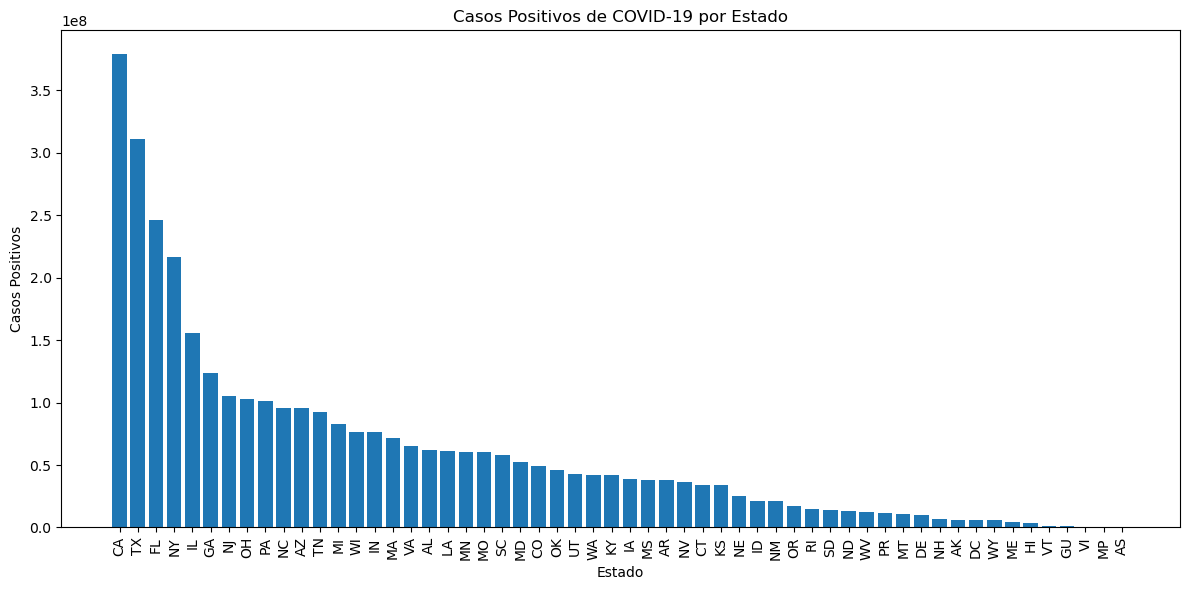

In [9]:
df_casos_por_estado = df[['state', 'positive']]

# Agrupar los datos por estado y sumar los casos positivos
casos_por_estado = df_casos_por_estado.groupby('state')['positive'].sum()

# Ordenar los estados por la cantidad de casos positivos de forma descendente
casos_por_estado = casos_por_estado.sort_values(ascending=False)

# Graficar los casos por estado
plt.figure(figsize=(12, 6))
plt.bar(casos_por_estado.index, casos_por_estado.values)
plt.xlabel('Estado')
plt.ylabel('Casos Positivos')
plt.title('Casos Positivos de COVID-19 por Estado')
plt.xticks(rotation=90)  # Rotar los nombres de los estados para que sean legibles
plt.tight_layout()
plt.show()

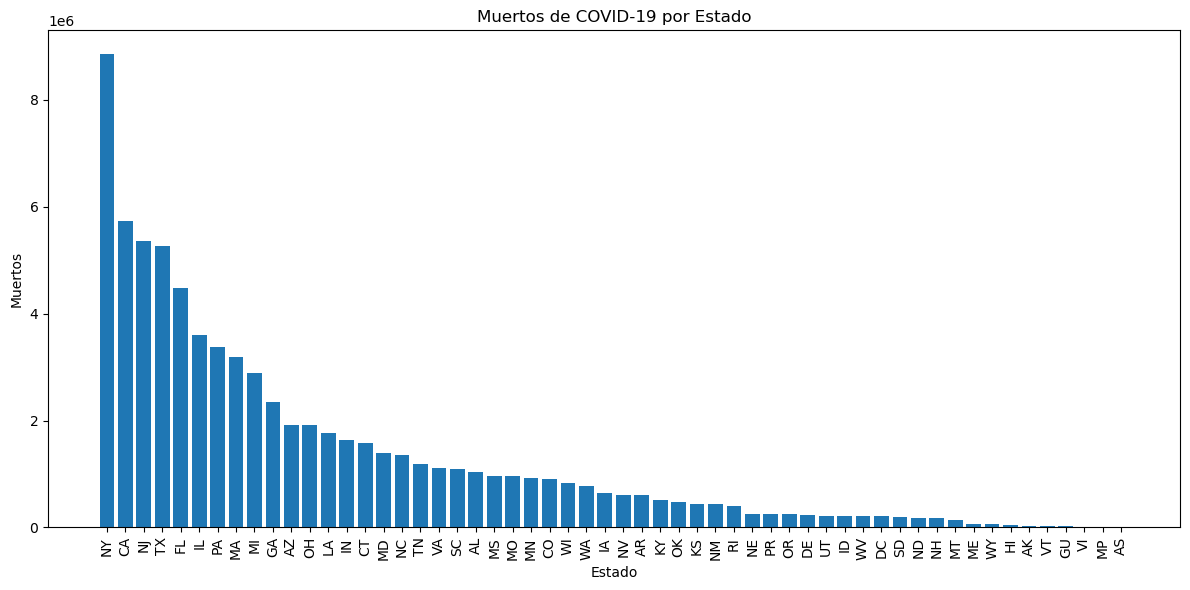

In [11]:
df_casos_por_estado = df[['state', 'death']]

# Agrupar los datos por estado y sumar los casos positivos
casos_por_estado = df_casos_por_estado.groupby('state')['death'].sum()

# Ordenar los estados por la cantidad de casos positivos de forma descendente
casos_por_estado = casos_por_estado.sort_values(ascending=False)

# Graficar los casos por estado
plt.figure(figsize=(12, 6))
plt.bar(casos_por_estado.index, casos_por_estado.values)
plt.xlabel('Estado')
plt.ylabel('Muertos')
plt.title('Muertos de COVID-19 por Estado')
plt.xticks(rotation=90)  # Rotar los nombres de los estados para que sean legibles
plt.tight_layout()
plt.show()

"Table B-5.
Number and Percentage of People in Poverty by State Using 3-Year Average: 2019, 2020, and 2021"										
(Numbers in thousands. Margins of error in thousands or percentage points as appropriate. People as of March of the following year. Information on confidentiality protection, sampling error, nonsampling error, and definitions is available at <https://www2.census.gov/programs-surveys/cps/techdocs/cpsmar22.+>)										

In [86]:
#importar tabla sobre riesgo de pobreza
import pandas as pd

dfrp = pd.read_excel("tableB-5.xlsx", skiprows=5)
dfrp = dfrp.drop([0, 52, 53, 54, 55], axis=0)
print(dfrp)


              Unnamed: 0  Estimate  Margin of error1 (±)  Estimate.1  \
1                Alabama     726.0                  90.0        14.6   
2                 Alaska      83.0                  10.0        11.7   
3                Arizona     806.0                  92.0        11.2   
4               Arkansas     447.0                  41.0        15.1   
5             California    4323.0                 205.0        11.0   
6               Colorado     511.0                 104.0         8.9   
7            Connecticut     325.0                  46.0         9.2   
8               Delaware      95.0                  13.0         9.6   
9   District of Columbia      97.0                   8.0        14.5   
10               Florida    2688.0                 186.0        12.5   
11               Georgia    1383.0                 174.0        13.1   
12                Hawaii     144.0                  19.0        10.1   
13                 Idaho     158.0                  16.0        

In [71]:
print(dfrp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              52 non-null     object 
 1   Estimate                52 non-null     float64
 2   Margin of error1 (±)    52 non-null     int64  
 3   Estimate.1              52 non-null     object 
 4   Margin of error1 (±).1  52 non-null     object 
 5   Estimate.2              52 non-null     float64
 6   Margin of error1 (±).2  52 non-null     int64  
 7   Estimate.3              52 non-null     object 
 8   Margin of error1 (±).3  52 non-null     object 
 9   Unnamed: 9              52 non-null     object 
 10  Unnamed: 10             52 non-null     object 
dtypes: float64(2), int64(2), object(7)
memory usage: 4.6+ KB
None


In [72]:
print(dfrp.columns)

Index(['Unnamed: 0', 'Estimate', 'Margin of error1 (±)', 'Estimate.1',
       'Margin of error1 (±).1', 'Estimate.2', 'Margin of error1 (±).2',
       'Estimate.3', 'Margin of error1 (±).3', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')


Estos datos se extrajeron de Census.gov (https://www.census.gov/library/publications/2022/demo/p60-277.h), que es una institución oficial del gobierno estadounidense para datos estadísticos.

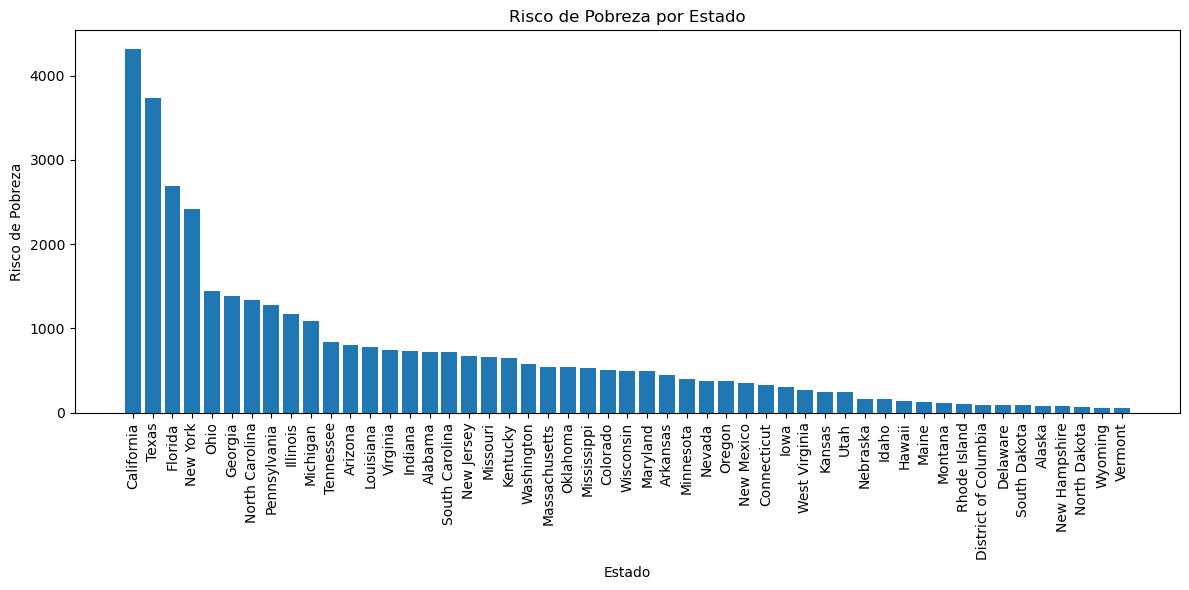

In [88]:
df_casos_por_estado = dfrp[['Unnamed: 0', 'Estimate']]

# Agrupar los datos por estado y sumar los casos positivos
casos_por_estado = df_casos_por_estado.groupby('Unnamed: 0')['Estimate'].sum()

# Ordenar los estados por la cantidad de casos positivos de forma descendente
casos_por_estado = casos_por_estado.sort_values(ascending=False)

# Graficar los casos por estado
plt.figure(figsize=(12, 6))
plt.bar(casos_por_estado.index, casos_por_estado.values)
plt.xlabel('Estado')
plt.ylabel('Risco de Pobreza')
plt.title('Risco de Pobreza por Estado')
plt.xticks(rotation=90)  # Rotar los nombres de los estados para que sean legibles
plt.tight_layout()
plt.show()

Se puede observar que los tres gráficos muestran una curva similar, incluyendo el posicionamiento de algunos estados.

No tenemos datos concluyentes, pero sí indicativos de la relación entre el número de infectados y muertos por COVID-19 y las personas más vulnerables socialmente.

Obviamente, debido a la brevedad del proyecto, no pudimos profundizar en dicha investigación. 